#                             STROKE PREDICTION

## Lets start with EXPLORATORY DATA ANALYSIS (EDA):

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

## LOAD OR COLLECT DATA FOR EDA

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Feature Information:
    
HYPERTENSION/ HIGH BLOOD PRESSURE puts a strain on all the blood vessels throughout your body, 
including the ones leading to the brain. 
This strain can damage your blood vessels, causing them to become harder and narrower.
This makes a blockage more likely to occur, which could cause a stroke.

HEART DISEASE increases your risk for stroke, because plaque builds up in the arteries and blocks the flow of 
oxygen-rich blood to the brain. 

## ANALYZE YOUR DATA-GENERATE INSIGHTS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(1) We have 5110 entries with 12 columns.
(2) Missing values in bmi.
(3) float(3), int(4), categorical values(5)

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

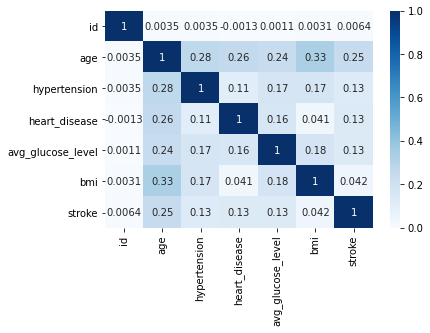

In [6]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

(1) Drop id column because it does not contribute for stroke prediction.
(2) Age is a good factor for stroke prediction

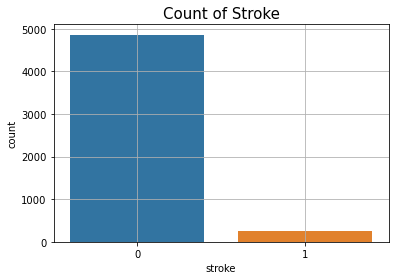

In [7]:
sns.countplot(df["stroke"])
plt.title("Count of Stroke",size=15)
plt.grid()
plt.show()

Tthere are higher samples of no stroke (stroke=0) as compared to the presence of stroke. Hence it is a Highly Imbalanced dataset.

In [8]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

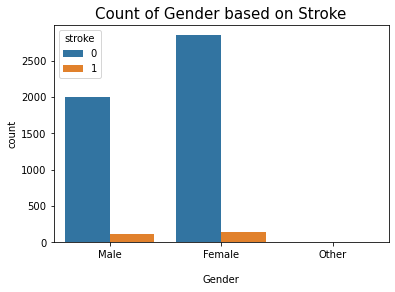

In [9]:
sns.countplot(df["gender"], hue=df["stroke"])
plt.xlabel("\nGender")
plt.title("Count of Gender based on Stroke",size=15)
plt.show()

The other value in Gender doesn't contribute in stroke prediction, so we can drop this value.

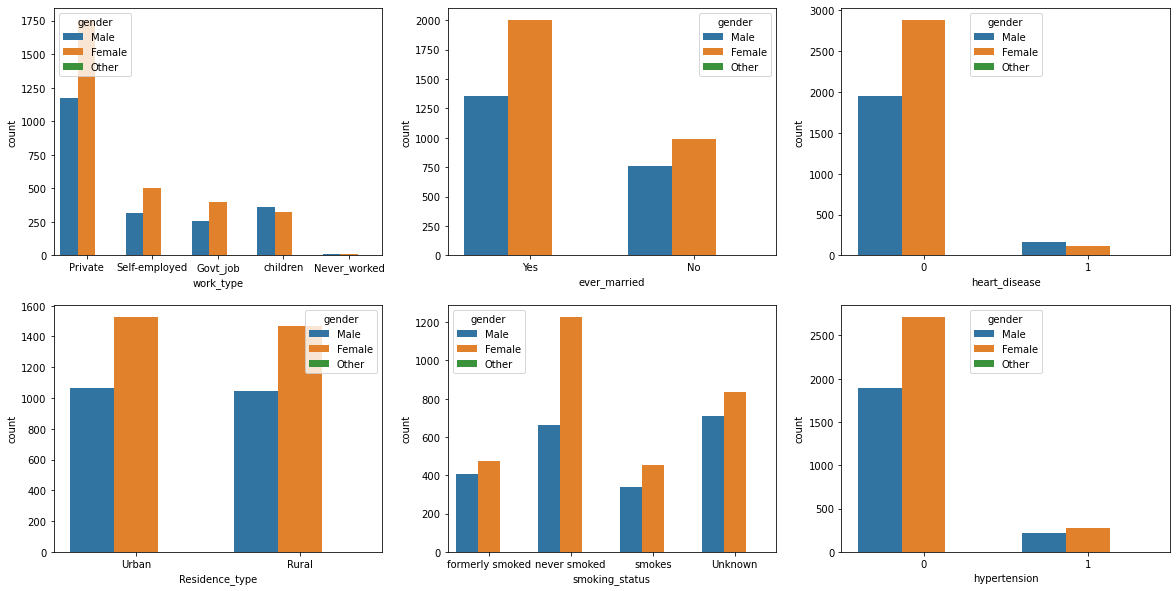

In [10]:
fig,axes=plt.subplots(2,3, figsize=(20,10))
sns.countplot(df["work_type"], hue=df["gender"],ax=axes[0,0])
sns.countplot(df["ever_married"], hue=df["gender"],ax=axes[0,1])
sns.countplot(df["Residence_type"], hue=df["gender"],ax=axes[1,0])
sns.countplot(df["smoking_status"], hue=df["gender"],ax=axes[1,1])
sns.countplot(df["heart_disease"], hue=df["gender"],ax=axes[0,2])
sns.countplot(df["hypertension"], hue=df["gender"],ax=axes[1,2])
plt.show()

WORK-TYPE
(1) Majority of Female are working in private sector followed by self employed
(2) Whereas in Male also majority of them are in Private sector.
EVER-MARRIED
(1)We have more married females compare to males
HEART-DISEASE
(1) As we can see ratio of having heart disease in females is higher than male.
RESIDENCE-TYPE
(1) Majority of females stay in urban area 
(2) Whereas in male it is observes that there is equal ratio.
SMOKING-STATUS
Ratio of female in never smoke is more than that of males but ration of smoke of male is less than that of female 
and same for formerly smoked 
HYPERTENSION
(1) Ratio of having hyper tension in females is higher than male.

<AxesSubplot:xlabel='hypertension', ylabel='count'>

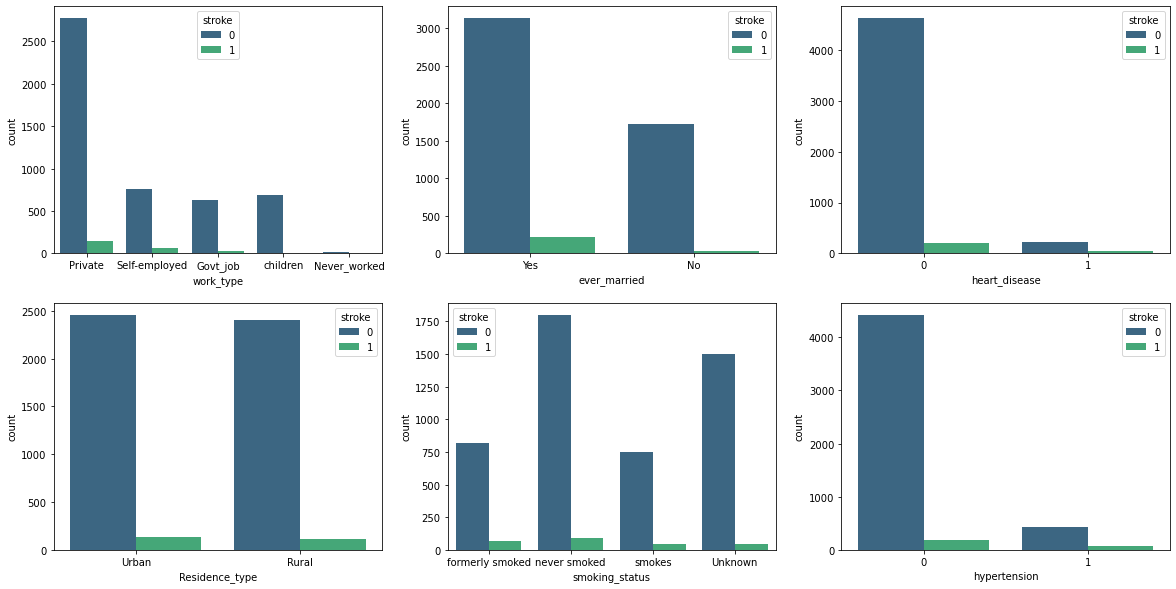

In [11]:
fig,axes=plt.subplots(2,3, figsize=(20,10))
sns.countplot(df["work_type"], hue=df["stroke"],ax=axes[0,0], palette="viridis")
sns.countplot(df["ever_married"], hue=df["stroke"],ax=axes[0,1], palette="viridis")
sns.countplot(df["Residence_type"], hue=df["stroke"],ax=axes[1,0], palette="viridis")
sns.countplot(df["smoking_status"], hue=df["stroke"],ax=axes[1,1], palette="viridis")
sns.countplot(df["heart_disease"], hue=df["stroke"],ax=axes[0,2], palette="viridis")
sns.countplot(df["hypertension"], hue=df["stroke"],ax=axes[1,2], palette="viridis")

WORK-TYPE
Ratio of people working in private sector are safe from stroke
EVER-MARRIED
stroke appear less in case of married status
HEART-DISEASE
People who are not suffering with heart disease seems they are safe from stroke
RESIDENCE-TYPE
Stroke does not depends on residence type.
SMOKING-STATUS
Ratio of absence of stroke in never smoked is high
HYPERTENSION
People who are not suffering with hypertnsion seems they are safe from stroke

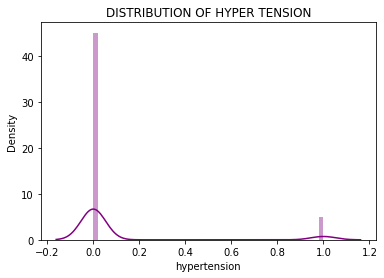

In [12]:
sns.distplot(df["hypertension"], color="purple")
plt.title("DISTRIBUTION OF HYPER TENSION")
plt.show()

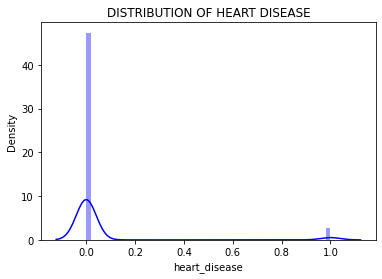

In [13]:
sns.distplot(df["heart_disease"], color="blue")
plt.title("DISTRIBUTION OF HEART DISEASE")
plt.show()

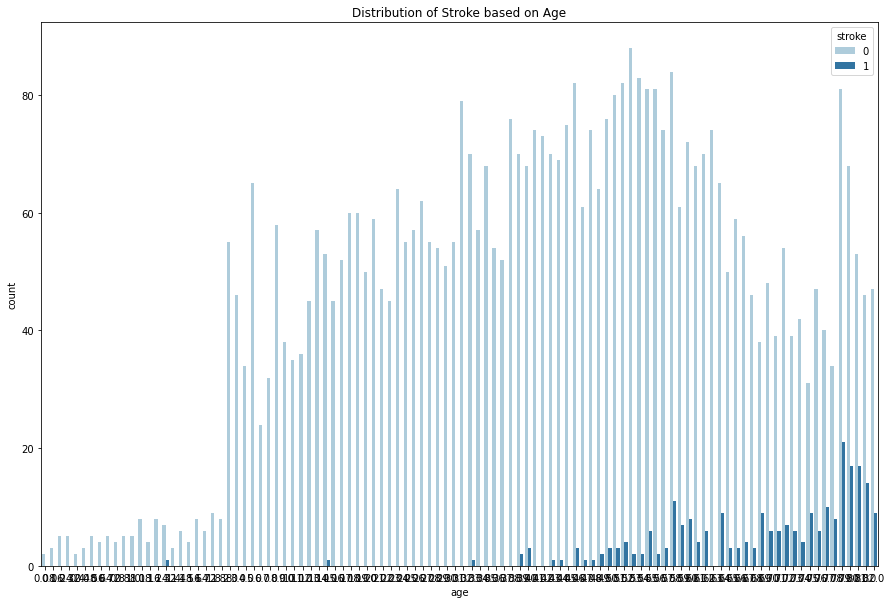

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x="age",hue="stroke",palette="Paired")
plt.title("Distribution of Stroke based on Age")
plt.show()

We can see slight upward trend when Age and stroke is concerned. 
Higher the Age, Higher the chances of having Stroke

## DATA CLEANING

In [15]:
df.drop("id", axis=1, inplace=True)

In [16]:
df.drop(df[df["gender"] == "Other"].index, inplace = True)
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [17]:
df[df["gender"]=="Male"]["bmi"].median()

28.4

In [18]:
df[df["gender"]=="Female"]["bmi"].median()

27.8

In [19]:
def fill(col):
    bmi=col[0]
    gender=col[1]
    if pd.isnull(bmi):
        if gender=="Female":
            return 27.8
        else:
            return 28.4
    else:
        return bmi

In [20]:
df["bmi"]=df[["bmi","gender"]].apply(fill,axis=1)

<AxesSubplot:>

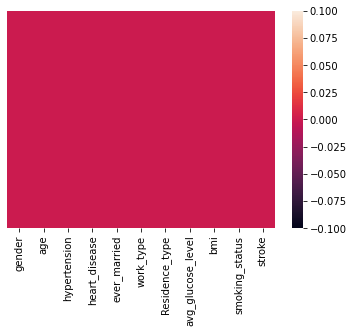

In [21]:
sns.heatmap(data=df.isnull(), yticklabels=False)

## PRE-PROCESSING

In [22]:
df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes(object)
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [23]:
df=pd.concat([df_cat,df_num],axis=1)

In [24]:
df

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,228.69,36.6,1
1,0,1,3,0,2,61.0,0,0,202.21,27.8,1
2,1,1,2,0,2,80.0,0,1,105.92,32.5,1
3,0,1,2,1,3,49.0,0,0,171.23,34.4,1
4,0,1,3,0,2,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,1,2,80.0,1,0,83.75,27.8,0
5106,0,1,3,1,2,81.0,0,0,125.20,40.0,0
5107,0,1,3,0,2,35.0,0,0,82.99,30.6,0
5108,1,1,2,0,1,51.0,0,0,166.29,25.6,0


In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

## MACHINE LEARNING MODEL

In [27]:
models=[]
models.append(("Logistic:",LogisticRegression()))
models.append(("KNN:", KNeighborsClassifier()))
models.append(("SVM:", SVC()))
models.append(("RandomForest:", RandomForestClassifier()))

for name, model in models:
    print(name)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest, ypred))

Logistic:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       1.00      0.01      0.02        83

    accuracy                           0.95      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.95      0.92      1533

KNN:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.17      0.01      0.02        83

    accuracy                           0.94      1533
   macro avg       0.56      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533

SVM:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533


Because of imbalance data the performance of model is very bad.
Lets balance our data first.

## SMOTE TECHNIQUE- SMOTE(SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE)

SMOTE is an oversampling technique.
SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. 
The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a 
and b to form a line segment in the feature space. The synthetic instances are generated as a convex 
combination of the two chosen instances a and b.

In [28]:
#!pip install imblearn- library to install

In [29]:
smote = SMOTE()
xnew, ynew = smote.fit_resample(x, y)
xtrain, xtest, ytrain, ytest = train_test_split(xnew, ynew, test_size=0.2, random_state=1)

In [30]:
ynew.value_counts()

0    4860
1    4860
Name: stroke, dtype: int64

Data is balanced!

In [31]:
models=[]
models.append(("Logistic:",LogisticRegression()))
models.append(("KNN:", KNeighborsClassifier()))
models.append(("SVM:", SVC()))
models.append(("RandomForest:", RandomForestClassifier()))

for name, model in models:
    print(name)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest, ypred))

Logistic:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       972
           1       0.79      0.82      0.80       972

    accuracy                           0.80      1944
   macro avg       0.80      0.80      0.80      1944
weighted avg       0.80      0.80      0.80      1944

KNN:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       972
           1       0.83      0.98      0.90       972

    accuracy                           0.89      1944
   macro avg       0.90      0.89      0.89      1944
weighted avg       0.90      0.89      0.89      1944

SVM:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       972
           1       0.74      0.84      0.78       972

    accuracy                           0.77      1944
   macro avg       0.77      0.77      0.77      1944
weighted avg       0.77      0.77      0.77      1944


Random forest is performing better.

In [32]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       972
           1       0.93      0.97      0.95       972

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944



In [33]:
train = rf.score(xtrain, ytrain)
test = rf.score(xtest, ytest)
print(f"Traning Result -: {train}")
print(f"Testing Result -: {test}")

Traning Result -: 1.0
Testing Result -: 0.9501028806584362


In [34]:
confusion_matrix(ytest, ypred)

array([[906,  66],
       [ 31, 941]], dtype=int64)

TP-907
FP(TYPE1 ERROR)-65
FN(TYPE2 ERROR)-42
FP-930

In [35]:
ypredprob=rf.predict_proba(xtest)[:,1]
fpr, tpr, thresh = roc_curve(ytest, ypredprob)

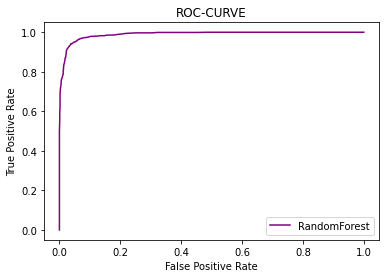

In [36]:
plt.plot(fpr, tpr,color='purple', label='RandomForest')
plt.title("ROC-CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Random Forest Classifier performed best amongst all the model with 95% accuracy.

In [37]:
df

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,228.69,36.6,1
1,0,1,3,0,2,61.0,0,0,202.21,27.8,1
2,1,1,2,0,2,80.0,0,1,105.92,32.5,1
3,0,1,2,1,3,49.0,0,0,171.23,34.4,1
4,0,1,3,0,2,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,1,2,80.0,1,0,83.75,27.8,0
5106,0,1,3,1,2,81.0,0,0,125.20,40.0,0
5107,0,1,3,0,2,35.0,0,0,82.99,30.6,0
5108,1,1,2,0,1,51.0,0,0,166.29,25.6,0


## UNSEEN DATA

In [38]:
newdata=[[1,1,2,1,1,67.0,0,1,228.69,36.6]]

In [39]:
rf.predict(newdata)

array([1], dtype=int64)

In [40]:
newdata=[[0,1,2,1,2,80.0,1,0,83.75,27.8]]

In [41]:
rf.predict(newdata)

array([0], dtype=int64)